In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
sv_info_file = 'horse/horse_info.txt'
sv_type = 'DEL'

In [3]:
#DELETIONS#
#df = pd.read_csv(sv_info_file, sep='\t', lineterminator='\n')
#df.columns = ['chrom', 'start', 'end', 'length']
#new_len = []
#for i,row in df.iterrows():
#    lens = row['end'] - row['start']
#    new_len.append(lens)
#df['length'] = new_len

In [4]:
#INSERTIONS#
df = pd.read_csv(sv_info_file, sep='\t', lineterminator='\n')
print(df.head())
#df.columns = ['chrom','length','seq']
#df.columns = ['chrom','start','end','length']
#df.columns = ['chrom','start','end','length','seq']
df.columns = ['chrom','start','end','length','seq','species']
print(df.head())

   1  3033494  3033494.1     .  \
0  1  3416469    3416469     .   
1  1  4086331    4086516  6641   
2  1  6036546    6036546   250   
3  1  6100124    6100124   250   
4  1  6764192    6764192    56   

  GCAACCCGTCCTGTTGATAACAGTGCTAATCACTCCACCTCACACTGGTGAGACAACAAAACCTTACAATTGTTGAGCGTCATAACTTCTCTTCGGTTTATAGTGCCAACGCCATTTTCATCTTTTGGGTATTTATTGTTTTTGTTGTTGGTTTTGTTTTTTGAGGAAGACTGGCCCTGAGCTAACATCCGTGCCCATCTTCCTCTACTTTACATGTGGGACGCCTACCACAGCATGACGTGCCAAGCAGTGCCATGTCTGCACCCAGGATCCGAACCGACGAACCTCGGGCCGCCAAAGCAGAACATGTGAGCTTAACCACTGCGCCACCAAGCCAGGCCTCTTTTGGGTATTTAAGTAAGTCAGGATAGTCTA-ATTATACAGCATCTCCTGTTCCTGGAGCAGCTGCTTACCACTCGGGACTCTGCCCAAGCCAGTCCCTCTGTCTGGAACGTCCACCCCTCGTCTCCCCTTCCAGTCAGGCTTCAG  \
0  TTTAAAGATTTTATTTTTTTCCTTTTTCTCCCCAAAGCCCCCCTGG...                                                                                                                                                                                                                                                       

In [5]:
df['length'].value_counts()

.       25110
246      4352
248      4275
249      4167
247      4166
        ...  
1906        1
4928        1
2671        1
3975        1
1535        1
Name: length, Length: 5136, dtype: int64

In [6]:
df = df[df['length']!='.']
#df['length'].value_counts()
print(len(df))
#df = df.drop_duplicates(subset='start', keep='first')
#print(len(df_new))

174589


In [7]:
df['length'] = df['length'].astype(int)

In [8]:
df['length'].value_counts()

246     4352
248     4275
249     4167
247     4166
245     4129
        ... 
1906       1
4928       1
2671       1
3975       1
1535       1
Name: length, Length: 5135, dtype: int64

In [48]:
t_rows = df.query('length > 1350')
t_rows = t_rows.query('length < 1450')

In [49]:
t = t_rows['length'].value_counts()
print(t[0:10])

1374    186
1373    164
1375     64
1372     33
1376     32
1369     23
1379     21
1378     19
1368     19
1371     14
Name: length, dtype: int64


Text(0.5, 0, 'Insertion Size (bp)')

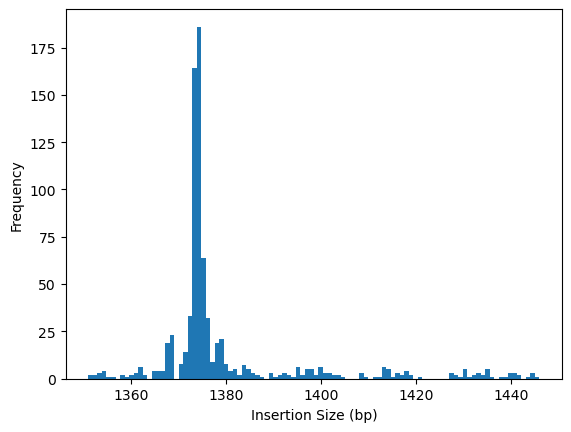

In [50]:
plt.hist(t_rows['length'], density=False, bins=100)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Insertion Size (bp)')
#plt.savefig('horse/insertion_freq.pdf')

([<matplotlib.patches.Wedge at 0x7f8a5b192d40>,
 [Text(0.37588977964987136, 1.0337827980551675, 'Reference TEs'),
  Text(-0.37588977964987125, -1.0337827980551677, '?')],
 [Text(0.20503078889992982, 0.5638815262119095, '38.9%'),
  Text(-0.20503078889992973, -0.5638815262119096, '61.1%')])

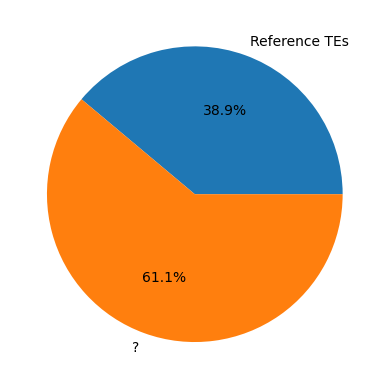

In [40]:
fig, ax = plt.subplots()
labels = 'Reference TEs', '?'
sizes = [1689, 2653]
ax.pie(sizes, labels=labels, autopct='%1.1f%%')